In [ ]:
#@title Modelos Discriminativos
# the functions below grabbed from http://www.astroml.org/book_figures/appendix/fig_neural_network.html
# our standard imports: matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')

radius = 0.3

arrow_kwargs = dict(head_width=0.05, fc='black')

def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + 1.4 * rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + 1.4 * rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], **arrow_kwargs)


def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fill=False, lw=2)
    ax.add_patch(circ)

# based on borrowed function we can create a new one to draw NN

def draw_net(input_size, output_size, hidden_layers=[], w=6, h=4):
  """Draw a network"""
  x = 0  # initial layer position

  ax = plt.subplot()
  ax.set_aspect('equal')
  ax.axis('off')

  ax.set_xlim([-2, -2 + w])
  ax.set_ylim([-h / 2 , h / 2 + 1])

  # set y position
  y_input = np.arange(-(input_size - 1) / 2, (input_size + 1) / 2, 1)
  y_output = np.arange(-(output_size - 1) / 2, (output_size + 1) / 2, 1)
  y_hidden = [np.arange(-(n - 1) / 2, (n + 1) / 2, 1) for n in hidden_layers]

  # draw input layer
  plt.text(x, h / 2 + 0.5, "Capa\nEntrada", ha='center', va='top', fontsize=16)

  for i, y in enumerate(y_input):
    draw_circle(ax, (x, y), radius)
    ax.text(x - 0.9, y, '$x_%i$' % (input_size - 1 - i),
            ha='right', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x - 0.9, y), 0.1, (x, y), radius)

  last_layer = y_input  # last layer y positions

  # draw hidden layers
  for ys in y_hidden:
    # shift x
    x += 2
    plt.text(x, h / 2 + 0.5, "Capa\nOculta", ha='center', va='top', fontsize=16)

    # draw neurons for each hidden layer
    for i, y1 in enumerate(ys):
      draw_circle(ax, (x, y1), radius)

      # connect a neuron with all neurons from previous layer
      if i != len(ys) - 1: # skip bias
        for y2 in last_layer:
          draw_connecting_arrow(ax, (x - 2, y2), radius, (x, y1), radius)

    # update last layer
    last_layer = ys

  x += 2  # update position for output layer

  # draw output layer
  plt.text(x, h / 2 + 0.5, "Capa\nSalida", ha='center', va='top', fontsize=16)

  for i, y1 in enumerate(y_output):
    draw_circle(ax, (x, y1), radius)
    ax.text(x + 0.8, y1, 'Salida', ha='left', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x, y1), radius, (x + 0.8, y1), 0.1)

    # connect each output neuron with all neurons from previous layer
    for y2 in last_layer:
      draw_connecting_arrow(ax, (x - 2, y2), radius, (x, y1), radius)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def printing_db(X, y, model):
    markers = ['x','o','*']
    colors = ['red','blue','green']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    res = 0.02
    #Plot regions
    x1min, x1max = X[:,0].min() -1, X[:,0].max() + 1
    x2min, x2max = X[:,1].min() -1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x1min,x1max,res),np.arange(x2min,x2max,res))

    output = model.predict(np.array([xx.ravel(), yy.ravel()]).T)
    output = output.reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx,yy, output, cmap=plt.cm.GnBu_r)

    #PLOT ALL SAMPLES
    for index, item in enumerate(np.unique(y)):
        plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=cmap(index),
        marker=markers[index], label=item)

    plt.xlabel('Petal length std')
    plt.ylabel('Petal width std')

    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

    plt.legend(loc='best')
    plt.show()

def plot_svc_decision(modelo, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y,x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = modelo.decision_function(xy).reshape(X.shape)
  ax.contour(X,Y,P,color='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
  if plot_support:
    ax.scatter(modelo.support_vectors_[:,0], modelo.support_vectors_[:,1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


# Support Vector Machines (SVM)
Es un enfoque *discriminativo*.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

# 3.1. SVM en una tarea de clasificación

Creamos un dataset

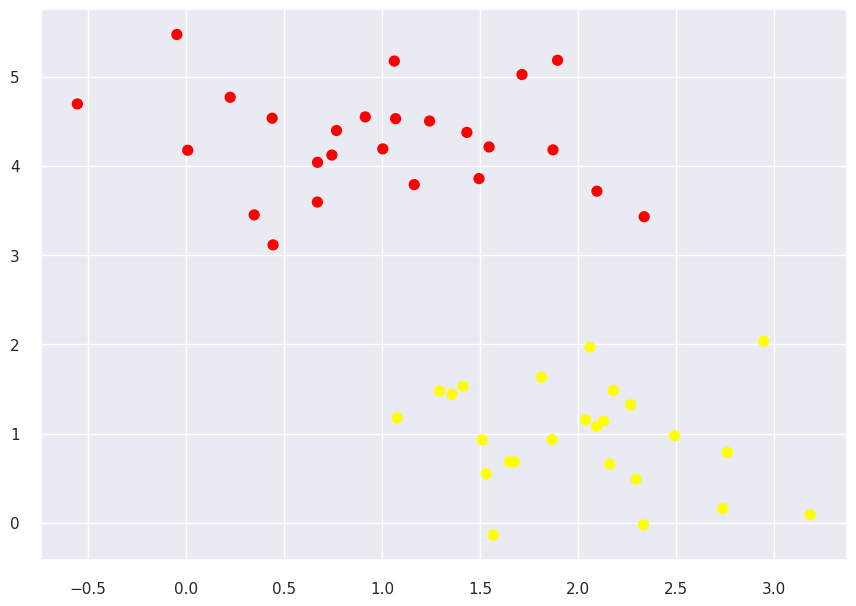

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:, 1], c=y, s = 50, cmap='autumn')

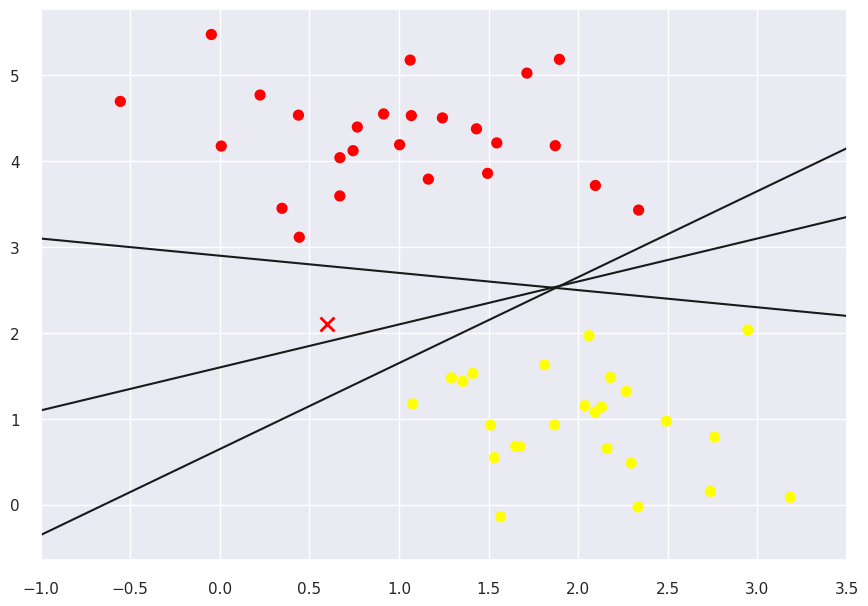

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:, 1], c=y, s = 50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m*xfit+b, '-k')
  plt.xlim(-1,3.5)

# 3.2. Maximización del Margen

- En vez de dibujar una simple línea entre dos clases...
- ... podemos dibujar una línea con un cierto grado de margen

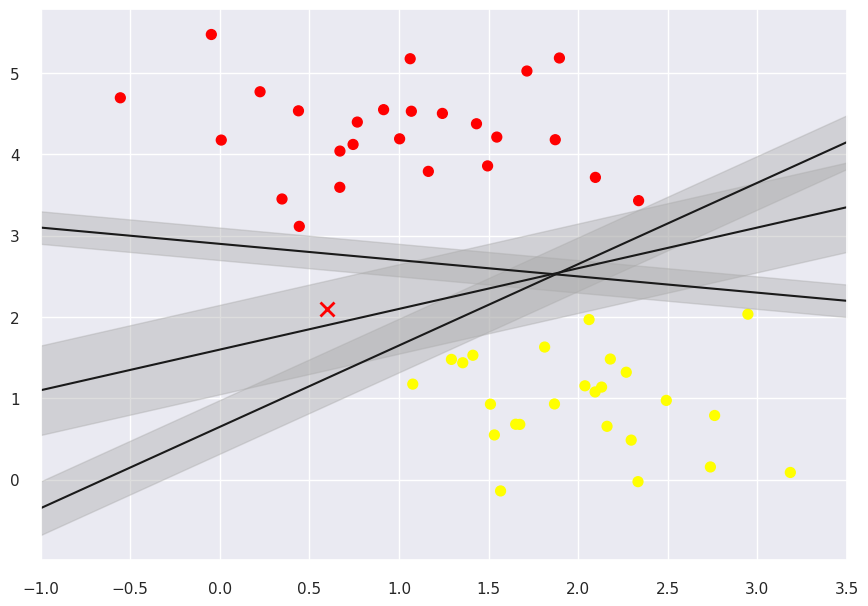

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:, 1], c=y, s = 50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m * xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit - d,yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4 )
  plt.xlim(-1,3.5)

# 3.3. Ajuste a SVM

In [ ]:
from sklearn.svm import SVC
modelo = SVC()
modelo.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision(modelo, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y,x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = modelo.decision_function(xy).reshape(X.shape)
  ax.contour(X,Y,P,color='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
  if plot_support:
    ax.scatter(modelo.support_vectors_[:,0], modelo.support_vectors_[:,1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: UserWarning: The following kwargs were not used by contour: 'color'


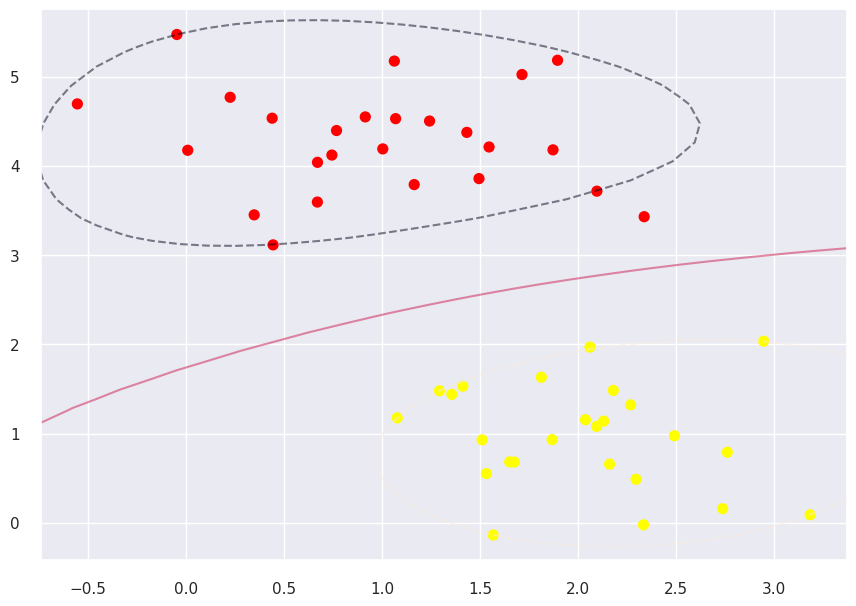

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision(modelo)

In [ ]:
print("Vectores de soporte: ", modelo.support_vectors_)

Vectores de soporte:  [[-0.04749204  5.47425256]
 [ 0.44359863  3.11530945]
 [ 2.33812285  3.43116792]
 [ 2.09680487  3.7174206 ]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 1.56737975 -0.1381059 ]
 [ 1.29297652  1.47930168]
 [ 2.94821884  2.03519717]]


# 3.4. Kernel SVM

- Es una función que combinado con SVM, llega a ser más robusto.

- Otro tipos de kernels son usados cuando los datos no son linealmente separables

In [ ]:
from sklearn.datasets.samples_generator import make_circles

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: UserWarning: The following kwargs were not used by contour: 'color'


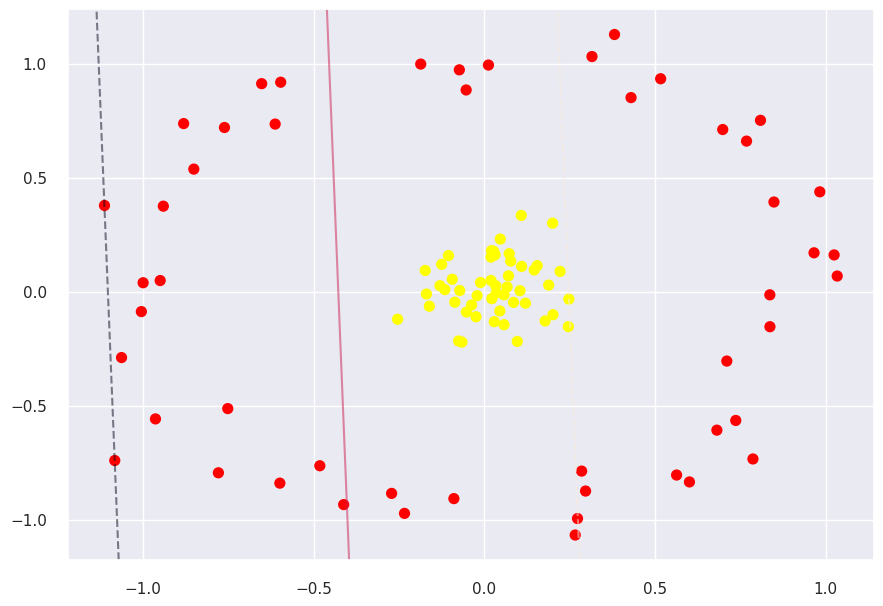

In [ ]:
X,y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear')
clf = clf.fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision(clf, plot_support=False);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: UserWarning: The following kwargs were not used by contour: 'color'


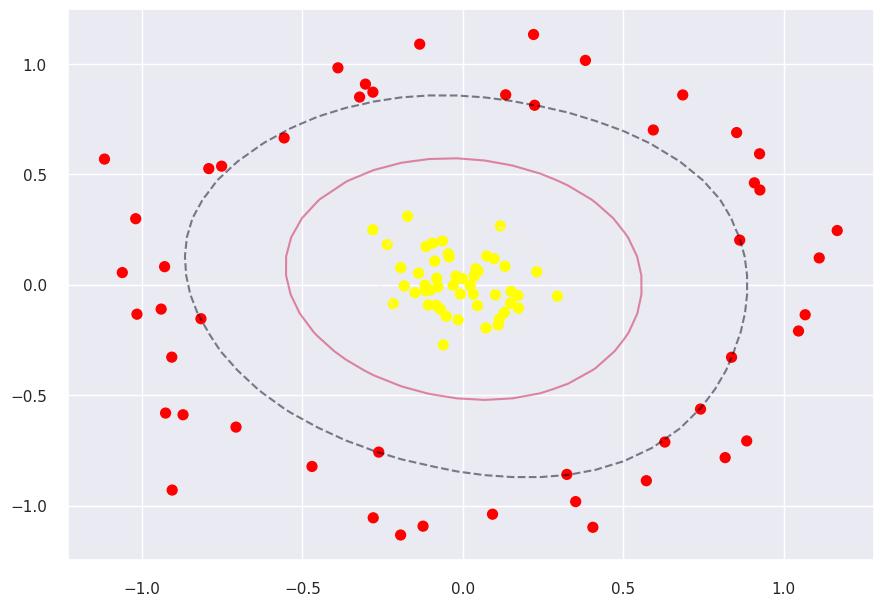

In [ ]:
X,y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='rbf')
clf = clf.fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision(clf, plot_support=False);

# 3.5. Suavizamiento de Márgenes de SVM

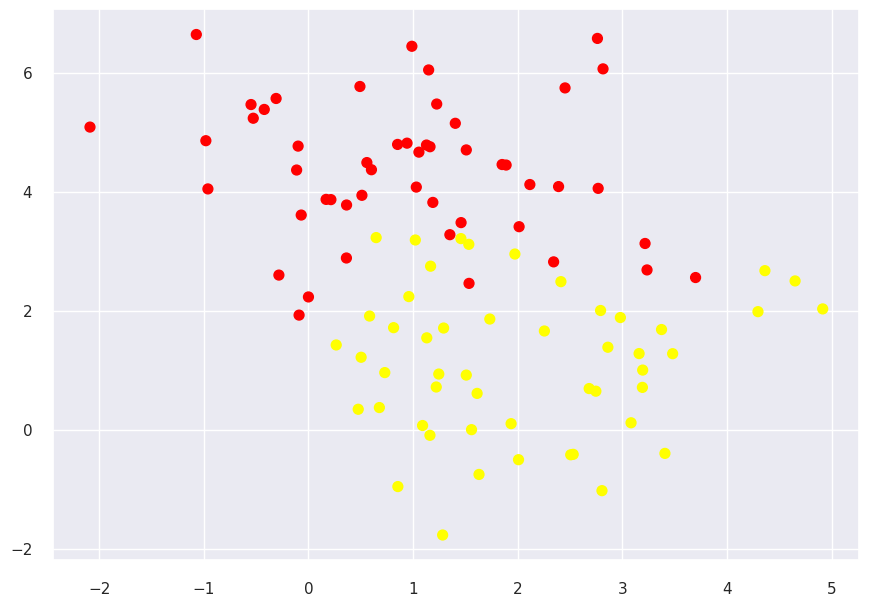

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

El parámetro $C$ se usa para manipular el margen

- Si $C$ es un valor grande, el margen es duro
- Si $C$ es un valor pequeño, el margen es suave

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: UserWarning: The following kwargs were not used by contour: 'color'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: UserWarning: The following kwargs were not used by contour: 'color'


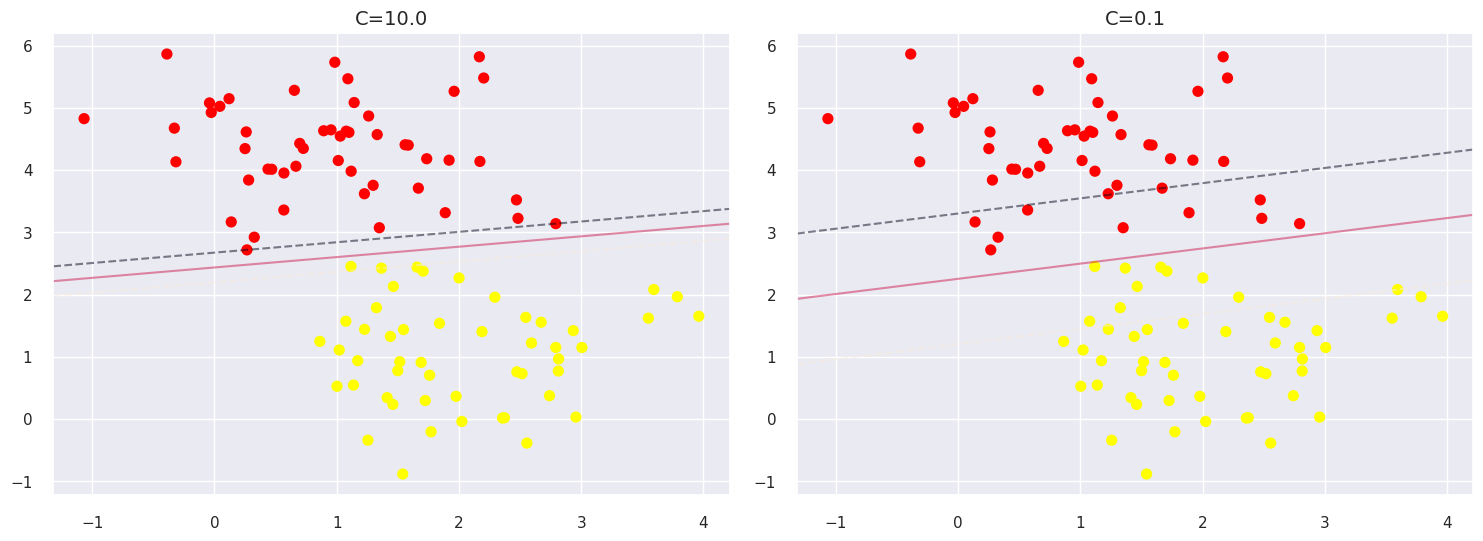

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  modelo = SVC(kernel='linear', C=C).fit(X,y)
  axi.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
  plot_svc_decision(modelo, axi)
  axi.scatter(modelo.support_vectors_[:,0], modelo.support_vectors_[:,1], s=300, lw=1, facecolors='none');
  axi.set_title("C={0:.1f}".format(C), size=14)